In [1]:
import numpy as np

from openspeechlib.feature_extraction.utils.delta import delta
from openspeechlib.utils.signal import power
from openspeechlib.utils.windows import extract_overlapping_frames_from_signal, apply_window_function_to_frames

In [2]:
from scipy.io import wavfile

In [3]:
from matplotlib import pyplot as plt
from IPython.display import Audio

In [65]:
frequency, signal = wavfile.read("F_08_1.wav")

In [66]:
frequency

44100

In [67]:
threshold=0.01

In [68]:
signal

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [69]:
signal.shape

(3928320,)

In [70]:
signal = signal[0:250000]

In [71]:
window_width = int(frequency*0.025)
windows_offset = int(frequency*0.01)
frames = extract_overlapping_frames_from_signal(
    signal,
    window_width,
    windows_offset
)
windowed_frames = apply_window_function_to_frames(frames)
energy = power(windowed_frames, axis=1)
frame_start_time = np.arange(0, signal.shape[-1], windows_offset)
interpolated_values = np.interp(np.arange(0, signal.shape[0]), frame_start_time, energy, )

In [72]:
interpolated_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       4.10866859e+09, 4.10866859e+09, 4.10866859e+09])

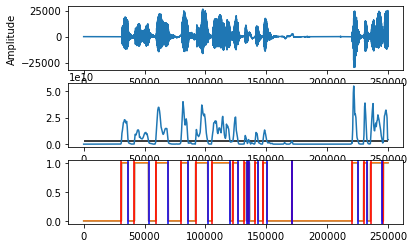

In [73]:

threshold=0.05
signal_size = signal.shape[-1]

plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot(np.arange(0, signal_size), interpolated_values)
plt.hlines(np.max(interpolated_values)*threshold, 0, signal_size)
plt.subplot(313)
voice_ranges = np.where(interpolated_values > np.max(interpolated_values) * threshold, 1, 0)
plt.plot(np.arange(0, signal_size), voice_ranges)
deltas = delta(voice_ranges, (1, -1))
changes_to_positive = np.where(deltas > 0)
changes_to_negative = np.where(deltas < 0)
# zip(changes_to_positive[0], changes_to_negative[0])
plt.plot(np.arange(0, signal_size), voice_ranges)
for positive in changes_to_positive[0]:
    plt.axvline(positive, color='r')
for negative in changes_to_negative[0]:
    plt.axvline(negative, color='b')

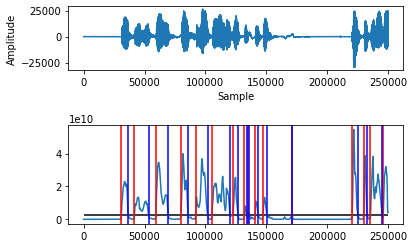

In [75]:
plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(np.arange(0, signal_size), interpolated_values)
plt.hlines(np.max(interpolated_values)*threshold, 0, signal_size)
voice_ranges = np.where(interpolated_values > np.max(interpolated_values) * threshold, 1, 0)

# plt.plot(np.arange(0, signal_size), voice_ranges)
deltas = delta(voice_ranges, (1, -1))
changes_to_positive = np.where(deltas > 0)
changes_to_negative = np.where(deltas < 0)
# zip(changes_to_positive[0], changes_to_negative[0])
# plt.plot(np.arange(0, signal_size), voice_ranges)
for positive in changes_to_positive[0]:
    plt.axvline(positive, color='r')
for negative in changes_to_negative[0]:
    plt.axvline(negative, color='b')

In [76]:
Audio(data=signal, rate=frequency)

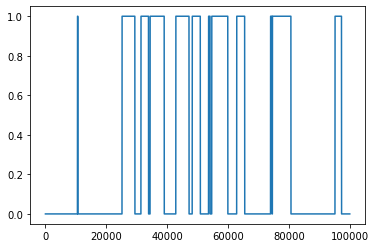

In [15]:
plt.plot(np.arange(0, signal_size), voice_ranges)

In [16]:
interpolated_values.shape

(100000,)

In [19]:
interpolated_values[0:10]

array([5.91703311e+08, 5.91149192e+08, 5.90595073e+08, 5.90040954e+08,
       5.89486836e+08, 5.88932717e+08, 5.88378598e+08, 5.87824480e+08,
       5.87270361e+08, 5.86716242e+08])

In [20]:
np.max(interpolated_values)

5150915976.346451

In [21]:
interpolated_values[0]/np.max(interpolated_values)

0.1148734153878983

AttributeError: 'tuple' object has no attribute 'shape'

In [112]:
dummy_signal = [1,1,1,1,1,2,3,4,5,6,7,6,4,3,2,1,1,1,1,1,1,1,1,1,1,2,4,5,6,7,8,9,10,10,8,6,5,4,3,2,1,1,1,1,1,1,1,1,2,3,4,5,6,7,8,9,9,9,9,9,9,8,8,8,8,7,7,7,7,6,6,6,5,4,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,5,6,7,6,6,6,6,6,6,5,4,3,2,1,1,1,1,1,1,1,1]

In [131]:
procesed_signal = interpolated_values
procesed_signal = dummy_signal
threshold=0.3
skip_adjacent = 4
silences_start = list()
signal_start = list()
is_silence = True
threshold_value = np.max(procesed_signal) * threshold
skipped_segments = 0
possible_start = 0
print(threshold_value)
for index, element in enumerate(procesed_signal):
    if is_silence and element > threshold_value:
        if skipped_segments == 0:
            print("Possible start for signal", index)
            possible_start = index
        skipped_segments += 1
        if skipped_segments > skip_adjacent:
            print(index, element, is_silence, element > threshold_value)
            is_silence = False
            signal_start.append(possible_start)
            possible_start = index
            skipped_segments = 0
            print("1")
            
            continue
    if not is_silence and element < threshold_value:
        if skipped_segments == 0:
            print("Possible start for silence", index)
            possible_start = index
        skipped_segments += 1
        if skipped_segments > skip_adjacent:
            print(index, element, is_silence, element > threshold_value)
            is_silence = True
            silences_start.append(possible_start)
            possible_start = index
            skipped_segments = 0
            print("2")
            
            


3.0
Possible start for signal 7
11 6 True True
1
Possible start for silence 14
18 1 False False
2
Possible start for signal 26
30 8 True True
1
Possible start for silence 39
43 1 False False
2
Possible start for signal 50
54 8 True True
1
Possible start for silence 75
79 1 False False
2
Possible start for signal 93
97 6 True True
1
Possible start for silence 106
110 1 False False
2


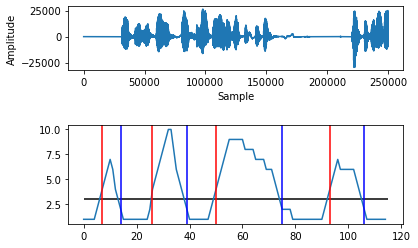

In [132]:
signal_size = len(procesed_signal)
plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(np.arange(0, signal_size), procesed_signal)
plt.hlines(np.max(procesed_signal)*threshold, 0, signal_size)
# zip(changes_to_positive[0], changes_to_negative[0])
# plt.plot(np.arange(0, signal_size), voice_ranges)
for positive in signal_start:
    plt.axvline(positive, color='r')
for negative in silences_start:
    plt.axvline(negative, color='b')

In [111]:
len(procesed_signal)

91

In [81]:
signal_start

[]

In [82]:
silences_start

[0]

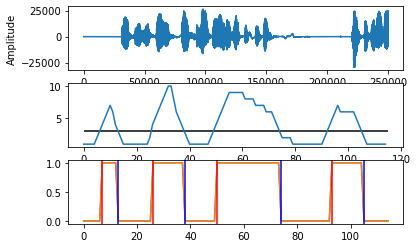

In [118]:
plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot(np.arange(0, signal_size), procesed_signal)
plt.hlines(np.max(procesed_signal)*threshold, 0, signal_size)
plt.subplot(313)
voice_ranges = np.where(procesed_signal > np.max(procesed_signal) * threshold, 1, 0)
plt.plot(np.arange(0, signal_size), voice_ranges)
deltas = delta(voice_ranges, (1, -1))
changes_to_positive = np.where(deltas > 0)
changes_to_negative = np.where(deltas < 0)
# zip(changes_to_positive[0], changes_to_negative[0])
plt.plot(np.arange(0, signal_size), voice_ranges)
for positive in changes_to_positive[0]:
    plt.axvline(positive, color='r')
for negative in changes_to_negative[0]:
    plt.axvline(negative, color='b')